# Programming Drill 3.2.2 What would happen if there were more than two slits? Write a program that asks a user to design a multislit experiment. The user notes the number of slits and the number of targets to measure the bullets. Then the user enters probabilities of the bullets’ moving from each slit to each target. An appropriate matrix is set up and then the matrix is multiplied by itself. Have the program print the appropriate resulting matrix and vector

Yanofsky, Noson S.. Quantum Computing for Computer Scientists (p. 88). Cambridge University Press. Kindle Edition. 

Let's start the code by defining our transition function

In [17]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [18]:
def change_state(M, init_state, time_click, doubly_stochastic=True):
    if doubly_stochastic:
        col_sums = np.sum(M, axis=0)
        if np.max(col_sums) > 1:
            print("The matrix does not comply to our need, because of columns")
            return None
        row_sums = np.sum(M, axis=1)
        if np.max(row_sums) > 1:
            print("The matrix does not comply to our need, because of rows")
            return None
    final_matrix = matrix_power(M, time_click)
    return np.matmul(final_matrix, init_state.transpose()).transpose()

Let's assume that we have this following data structure to represent the slits and the targets and the corresponding probabbilities

```
[[1/2, 1/2],
 [[1/3, 1/3], [1/3, 1/3], [1/3, 1/3]]
]
```

Here the list hold the probality of the bullet reaching to each slots in t+1 and then the second list is a combination of lists each of the which represents the probability of reaching a target in t+2 with alternative elements being either the ones solely reachable from slit i or the one ones reachable from i and j both

In [19]:
def draw_graph_from_np_array(array):
    G = nx.from_numpy_matrix(array, create_using=nx.MultiDiGraph())
    G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
    G.graph['graph'] = {'scale': '3'}
    pos = nx.circular_layout(G)
    nx.draw_circular(G)
    labels = {i : i for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=15)
    plt.show()

In [256]:
def construct_transition_matrix(slits_and_targets):
    tm = []
    slit_probs = slits_and_targets[0]
    target_probs = slits_and_targets[1]
    
    dimension = len(slit_probs) + 1
    
    for i, x in enumerate(target_probs):
        if i % 2 == 0:
            dimension += len(x)
        else:
            dimension += 1
    
    trm = np.zeros((dimension, dimension))
    target_row_start = 0
    
    for i, slit in enumerate(slit_probs):
        trm[i+1][0] = slit
        target_row_start += 1
    
    target_row_start += 1
    target_col_start = 1
    target_dig_row_start = target_row_start
    
    for i, tp in enumerate(target_probs):
        if i % 2 == 0:
            for t in tp:
                trm[target_row_start][target_col_start] = t
                target_row_start += 1
        else:
            for j, t in enumerate(tp):
                trm[target_row_start][target_col_start+j] = t
            target_col_start += 1
            target_row_start += 1
    
    m = target_dig_row_start
    for i in range(m, dimension):
        trm[target_dig_row_start][target_dig_row_start] = 1
        target_dig_row_start += 1
    
    return trm

In [261]:
M = construct_transition_matrix([[1/3, 1/3, 1/3],
                                 #[1/2, 1/2],
 [[1/3, 1/3], [1/3, 1/3], [1/3], [1/3, 1/3], [1/3, 1/3]]
 #[[1/3, 1/3], [1/3, 1/3], [1/3, 1/3]]
])

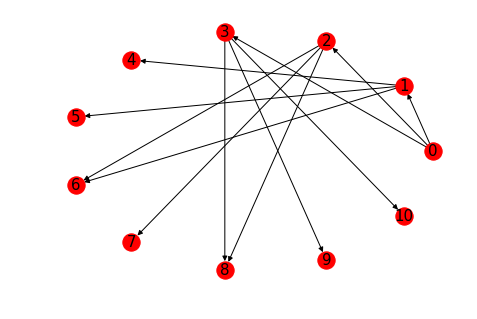

In [262]:
draw_graph_from_np_array(M.transpose())

In [263]:
print(M)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.         1.
  0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.         0.
  1.         0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.         0.
  0.         1.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.33333333 0.        

__We have successfully built the transition matrix and based on this work, and the work we did in the function `change_state` we can perform any number of slits experiment__ QED :)